In [4]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [5]:
#url = 'C:\\Users\\Richard\\Documents\\Jupyter\\mlb_statcast_2015-24.csv'
url = 'C:\\Users\\User\\Desktop\\El final\\AI Project\\mlb_statcast_2015-24.csv'
ds = pd.read_csv(url)

C:\Users\User\AppData\Local\Temp\ipykernel_17700\1051331011.py:3: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv(url)


In [6]:
out_cols = [
    'pitch_type', 'release_speed', 'events', 'zone', 'type', 
]

In [7]:
def data_prep(df):
    #Selects and cleans features
    #Returns a dataframe ready for model training

    keep_cols = [
    'pitch_type', 'game_date', 'release_speed', 'release_pos_x', 'release_pos_z', 
    'player_name', 'batter', 'pitcher', 'events', 'description', 'zone', 'stand', 
    'p_throws', 'type', 'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 
    'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 
    'inning', 'inning_topbot', 'hc_x', 'hc_y', 'fielder_2', 'vx0', 'vy0', 'vz0', 'ax', 
    'ay', 'az', 'sz_top', 'sz_bot', 'hit_distance_sc', 'effective_speed', 'release_spin_rate', 
    'release_extension', 'game_pk', 'release_pos_y', 'at_bat_number', 
    'pitch_number', 'pitch_name', 'home_score', 'away_score', 'spin_axis', 'delta_run_exp'
    ]

    df = df[keep_cols]
    df = df[~pd.isna(df['pitch_type'])] #Drop nan values in pitch_type

    df['on_1b'] = df['on_1b'].apply(lambda x: not np.isnan(x))
    df['on_2b'] = df['on_2b'].apply(lambda x: not np.isnan(x))
    df['on_3b'] = df['on_3b'].apply(lambda x: not np.isnan(x))

    unknown_pitches = ['PO', 'FO', 'UN', 'XX', 'IN']
    df = df[~df['pitch_type'].isin(unknown_pitches)]
    #df = df[~df['prev_pitch_type'].isin(unknown_pitches)]

    return df
    

In [8]:
ds = data_prep(ds)
print(ds.head(50))

   pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
0          KC  2024-10-30           77.5          -1.11           5.65   
1          KC  2024-10-30           78.7          -1.01           5.73   
2          FC  2024-10-30           93.1          -1.19           5.53   
3          KC  2024-10-30           78.5          -1.19           5.70   
4          KC  2024-10-30           77.4          -1.23           5.78   
5          FF  2024-10-30           97.2          -1.34           5.56   
6          KC  2024-10-30           78.4          -1.14           5.73   
7          KC  2024-10-30           78.1          -1.24           5.74   
8          FF  2024-10-30           96.2          -1.31           5.62   
9          KC  2024-10-30           78.9          -1.07           5.69   
10         KC  2024-10-30           78.7          -1.25           5.79   
11         KC  2024-10-30           77.6          -1.08           5.75   
12         FF  2024-10-30           96

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def show_feature_distributions(df, pitcherid): 
    #feature distributions
    try:
        df.hist(figsize=(20, 20), bins=20, edgecolor="black")
        plt.suptitle(f"Feature Distributions for pitcher #{pitcherid}", fontsize=16)
        plt.show()  
    except Exception as e:
        print(f"Failed to show feature distribution for given df -> {e}")


def fetch_pitcher_records(global_df, pitcherid): 
    try:
        pitcher_scoped_df = global_df[global_df['pitcher'] == pitcherid]
        if(not pitcher_scoped_df.size): #catch no results... Invalid pitcher id will return a 0 size dataframe
            print(f"Pitcher #{pitcherid} is not in original dataset.")
            return None
        print(f"Fetched {pitcher_scoped_df.size} entries for pitcher {pitcherid}.")
    except Exception as e: 
        print(f"Error fetching records for Pitcher #{pitcherid} -> {e}.")
        return None
    return pitcher_scoped_df

Fetched 687887 entries for pitcher 621111.


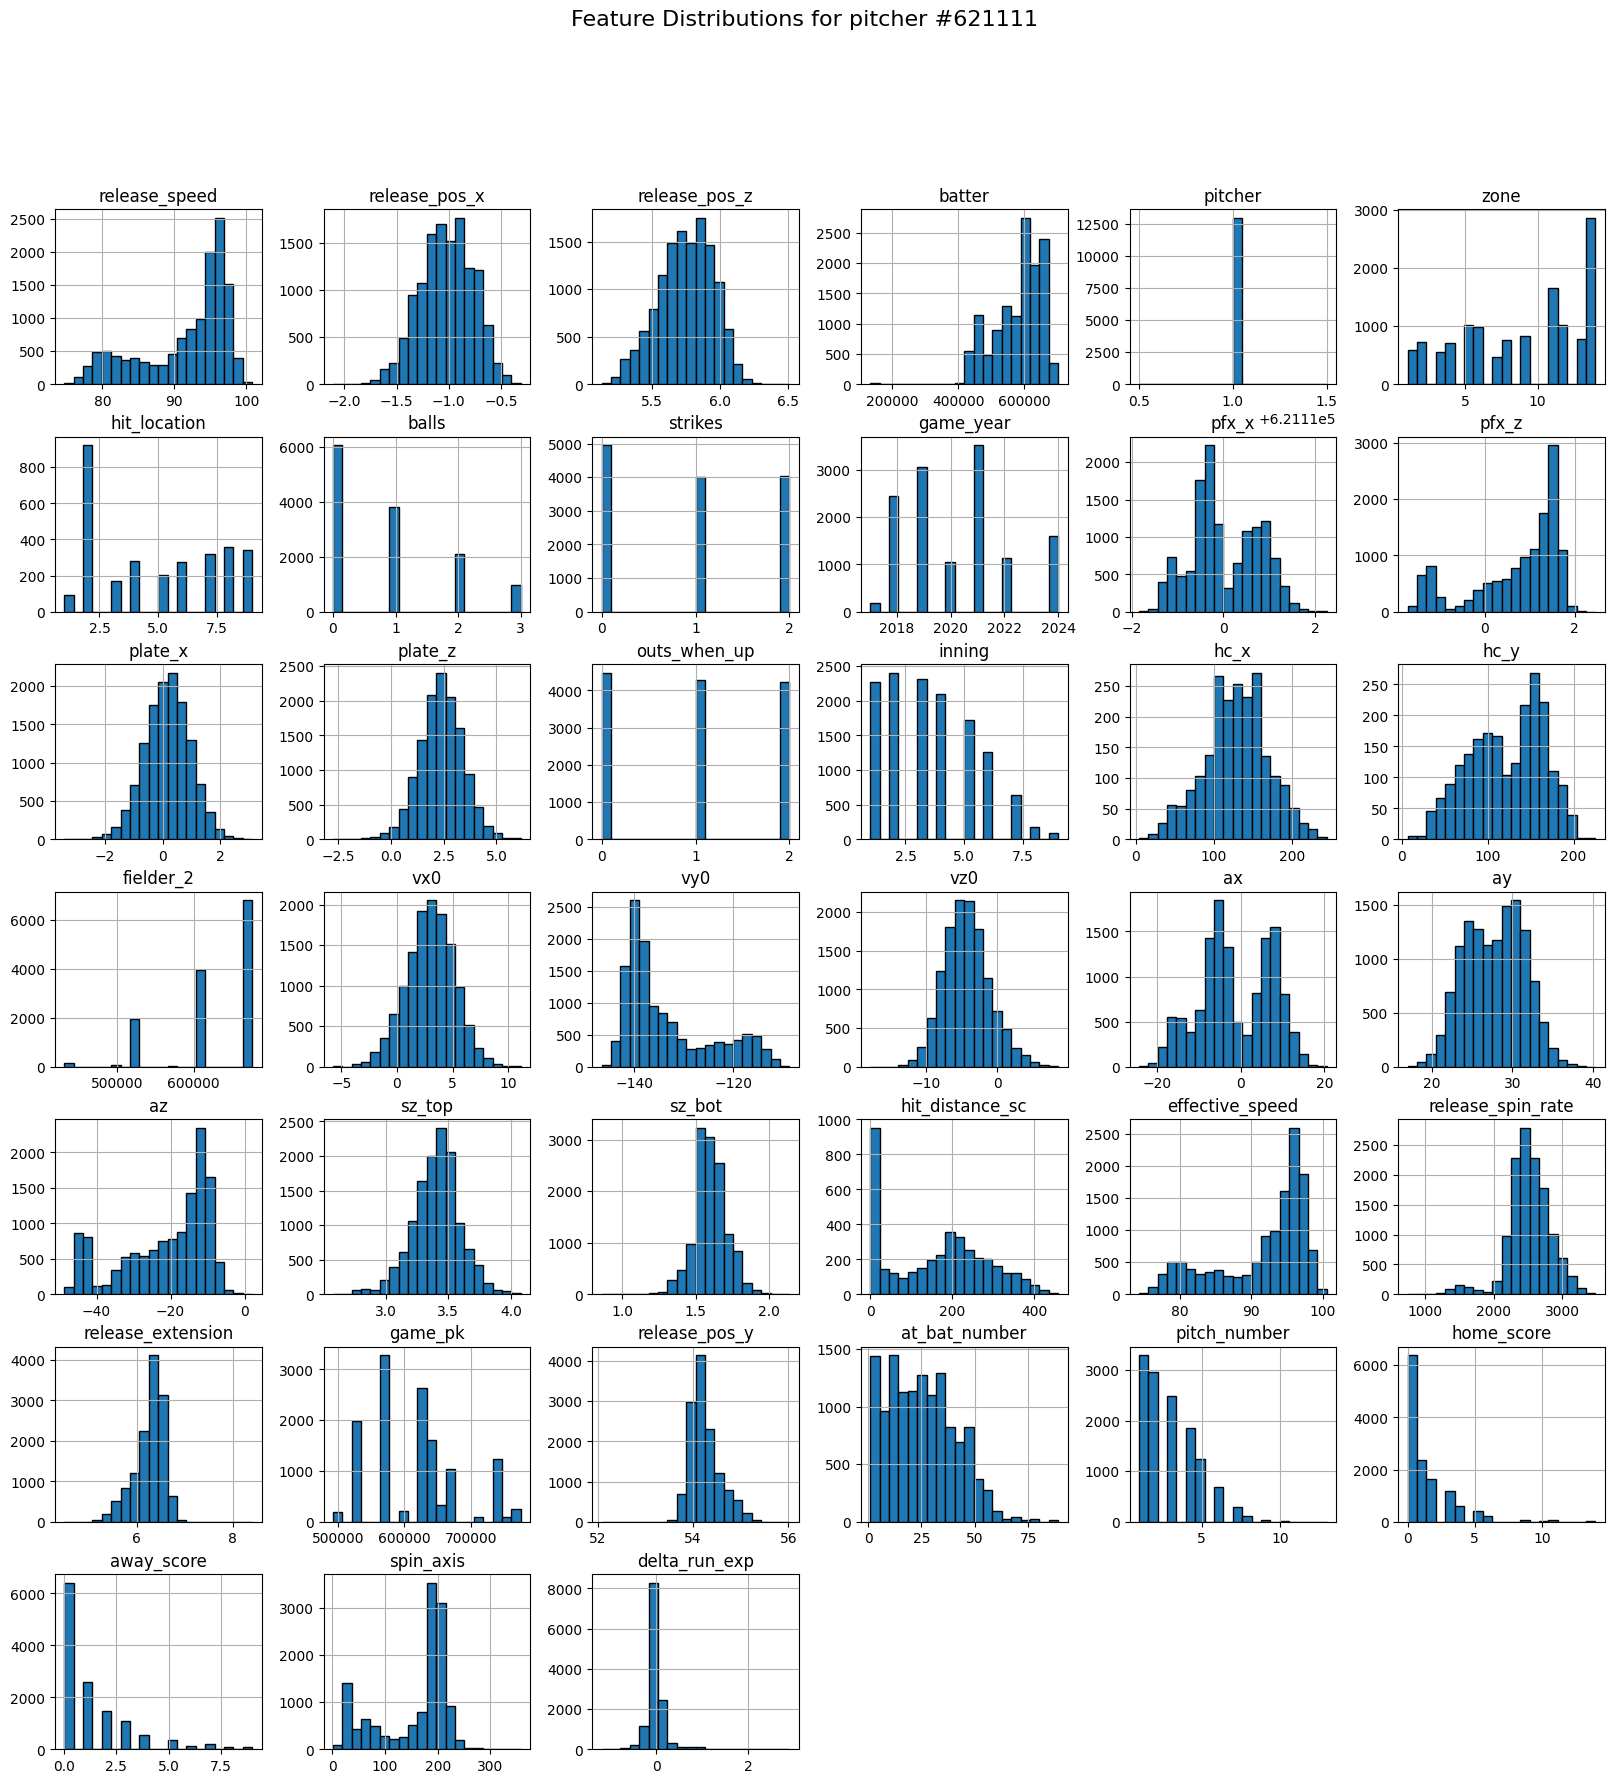

In [11]:
data_62111 = fetch_pitcher_records(global_df= ds, pitcherid= 621111)

show_feature_distributions(df= data_62111, pitcherid=621111)